In [1]:
import numpy as np
import pandas as pd
import urllib.request
import json


In [2]:
#33.42632567356752, -111.93135542879193

In [96]:
url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline' + \
  '/33.42632567356752,-111.93135542879193/2025-06-02/2025-06-9?unitGroup=metric&elements=datetimeEpoch,solarradiation' + \
  '&key=298LYYNTAZVEU5JN67C8W5AQE&contentType=json'

In [97]:
response = urllib.request.urlopen(url).read()

In [98]:
data = json.loads(response)
print(json.dumps(data, indent=2))

{
  "queryCost": 25,
  "latitude": 33.42632567356752,
  "longitude": -111.93135542879193,
  "resolvedAddress": "33.42632567356752,-111.93135542879193",
  "address": "33.42632567356752,-111.93135542879193",
  "timezone": "America/Phoenix",
  "tzoffset": -7.0,
  "days": [
    {
      "datetimeEpoch": 1748847600,
      "solarradiation": 227.3,
      "hours": [
        {
          "datetimeEpoch": 1748847600,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748851200,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748854800,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748858400,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748862000,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748865600,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748869200,
          "solarradiation": 23.0
      

In [99]:
from datetime import datetime
lists = []
for day in data['days']:
    for hour_data in day['hours']:
        time = datetime.fromtimestamp(hour_data['datetimeEpoch'])
        solar_radiation = [time, hour_data['solarradiation']]
        lists.append(solar_radiation)

In [100]:
lists

[[datetime.datetime(2025, 6, 2, 0, 0), 0.0],
 [datetime.datetime(2025, 6, 2, 1, 0), 0.0],
 [datetime.datetime(2025, 6, 2, 2, 0), 0.0],
 [datetime.datetime(2025, 6, 2, 3, 0), 0.0],
 [datetime.datetime(2025, 6, 2, 4, 0), 0.0],
 [datetime.datetime(2025, 6, 2, 5, 0), 0.0],
 [datetime.datetime(2025, 6, 2, 6, 0), 23.0],
 [datetime.datetime(2025, 6, 2, 7, 0), 190.0],
 [datetime.datetime(2025, 6, 2, 8, 0), 206.0],
 [datetime.datetime(2025, 6, 2, 9, 0), 127.0],
 [datetime.datetime(2025, 6, 2, 10, 0), 823.0],
 [datetime.datetime(2025, 6, 2, 11, 0), 229.0],
 [datetime.datetime(2025, 6, 2, 12, 0), 1023.0],
 [datetime.datetime(2025, 6, 2, 13, 0), 1016.0],
 [datetime.datetime(2025, 6, 2, 14, 0), 251.0],
 [datetime.datetime(2025, 6, 2, 15, 0), 772.0],
 [datetime.datetime(2025, 6, 2, 16, 0), 635.0],
 [datetime.datetime(2025, 6, 2, 17, 0), 83.0],
 [datetime.datetime(2025, 6, 2, 18, 0), 51.0],
 [datetime.datetime(2025, 6, 2, 19, 0), 25.0],
 [datetime.datetime(2025, 6, 2, 20, 0), 0.0],
 [datetime.datetim

In [101]:
df_solar = pd.DataFrame(lists, columns=['time', 'solar_radiation'])
df_solar

,time,solar_radiation
0,2025-06-02 00:00:00,0.0
1,2025-06-02 01:00:00,0.0
2,2025-06-02 02:00:00,0.0
3,2025-06-02 03:00:00,0.0
4,2025-06-02 04:00:00,0.0
...,...,...
187,2025-06-09 19:00:00,423.0
188,2025-06-09 20:00:00,185.0
189,2025-06-09 21:00:00,154.0
190,2025-06-09 22:00:00,123.0


<Axes: title={'center': 'Solar radiation'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

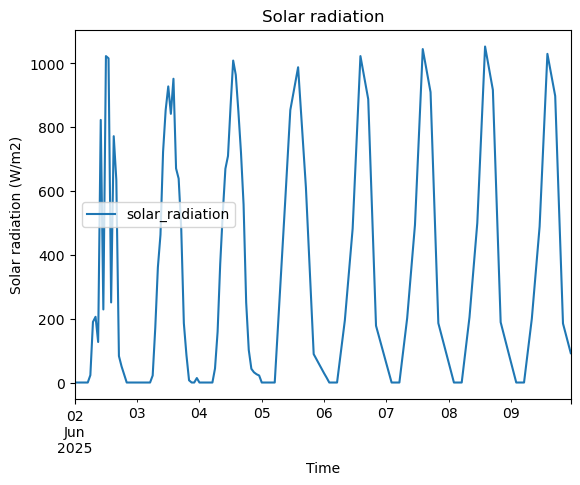

In [102]:
df_solar.set_index('time', inplace=True)
df_solar.plot(kind='line', title='Solar radiation', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [103]:
efficiency = 0.20
area = 2
num_panels = 600
total_area = num_panels * area
print(total_area, 'm2')

1200 m2


In [104]:
df_solar['pv'] = df_solar['solar_radiation'] * efficiency * total_area / 1000
df_solar

,solar_radiation,pv
time,,
2025-06-02 00:00:00,0.0,0.00
2025-06-02 01:00:00,0.0,0.00
2025-06-02 02:00:00,0.0,0.00
2025-06-02 03:00:00,0.0,0.00
2025-06-02 04:00:00,0.0,0.00
...,...,...
2025-06-09 19:00:00,423.0,101.52
2025-06-09 20:00:00,185.0,44.40
2025-06-09 21:00:00,154.0,36.96


<Axes: title={'center': 'Solar Farm Power'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

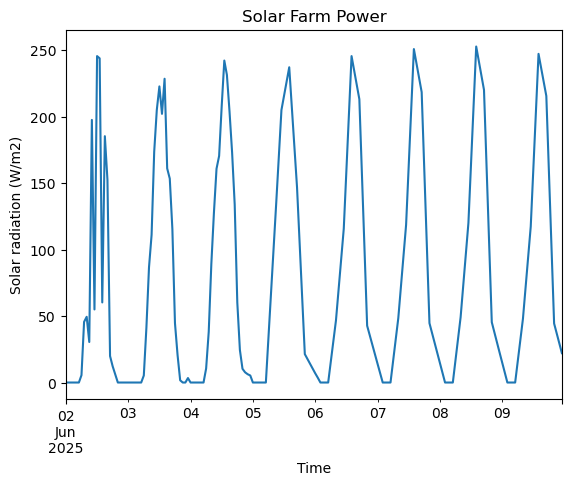

In [105]:
df_solar['pv'].plot(kind='line', title='Solar Farm Power', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [106]:
# spain 42.59811552995308,-5.571933829892936

In [107]:
url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline' + \
  '/42.59811552995308,-5.571933829892936/2025-06-02/2025-06-9?unitGroup=metric&elements=datetimeEpoch,solarradiation' + \
  '&key=298LYYNTAZVEU5JN67C8W5AQE&contentType=json'

In [108]:
response = urllib.request.urlopen(url).read()

In [109]:
data = json.loads(response)
print(json.dumps(data, indent=2))

{
  "queryCost": 49,
  "latitude": 42.59811552995308,
  "longitude": -5.571933829892936,
  "resolvedAddress": "42.59811552995308,-5.571933829892936",
  "address": "42.59811552995308,-5.571933829892936",
  "timezone": "Europe/Madrid",
  "tzoffset": 2.0,
  "days": [
    {
      "datetimeEpoch": 1748815200,
      "solarradiation": 175.9,
      "hours": [
        {
          "datetimeEpoch": 1748815200,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748818800,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748822400,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748826000,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748829600,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748833200,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1748836800,
          "solarradiation": 0.0
        },
  

In [110]:
from datetime import datetime
lists = []
for day in data['days']:
    for hour_data in day['hours']:
        time = datetime.fromtimestamp(hour_data['datetimeEpoch'])
        solar_radiation = [time, hour_data['solarradiation']]
        lists.append(solar_radiation)

In [111]:
lists

[[datetime.datetime(2025, 6, 1, 15, 0), 0.0],
 [datetime.datetime(2025, 6, 1, 16, 0), 0.0],
 [datetime.datetime(2025, 6, 1, 17, 0), 0.0],
 [datetime.datetime(2025, 6, 1, 18, 0), 0.0],
 [datetime.datetime(2025, 6, 1, 19, 0), 0.0],
 [datetime.datetime(2025, 6, 1, 20, 0), 0.0],
 [datetime.datetime(2025, 6, 1, 21, 0), 0.0],
 [datetime.datetime(2025, 6, 1, 22, 0), 0.0],
 [datetime.datetime(2025, 6, 1, 23, 0), 57.0],
 [datetime.datetime(2025, 6, 2, 0, 0), 184.0],
 [datetime.datetime(2025, 6, 2, 1, 0), 391.0],
 [datetime.datetime(2025, 6, 2, 2, 0), 511.0],
 [datetime.datetime(2025, 6, 2, 3, 0), 396.0],
 [datetime.datetime(2025, 6, 2, 4, 0), 334.0],
 [datetime.datetime(2025, 6, 2, 5, 0), 317.0],
 [datetime.datetime(2025, 6, 2, 6, 0), 311.0],
 [datetime.datetime(2025, 6, 2, 7, 0), 295.0],
 [datetime.datetime(2025, 6, 2, 8, 0), 235.0],
 [datetime.datetime(2025, 6, 2, 9, 0), 323.0],
 [datetime.datetime(2025, 6, 2, 10, 0), 480.0],
 [datetime.datetime(2025, 6, 2, 11, 0), 277.0],
 [datetime.datetime

In [112]:
sdf_solar = pd.DataFrame(lists, columns=['time', 'solar_radiation'])
sdf_solar

,time,solar_radiation
0,2025-06-01 15:00:00,0.0
1,2025-06-01 16:00:00,0.0
2,2025-06-01 17:00:00,0.0
3,2025-06-01 18:00:00,0.0
4,2025-06-01 19:00:00,0.0
...,...,...
187,2025-06-09 10:00:00,613.0
188,2025-06-09 11:00:00,469.0
189,2025-06-09 12:00:00,312.7
190,2025-06-09 13:00:00,156.3


<Axes: title={'center': 'Solar radiation'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

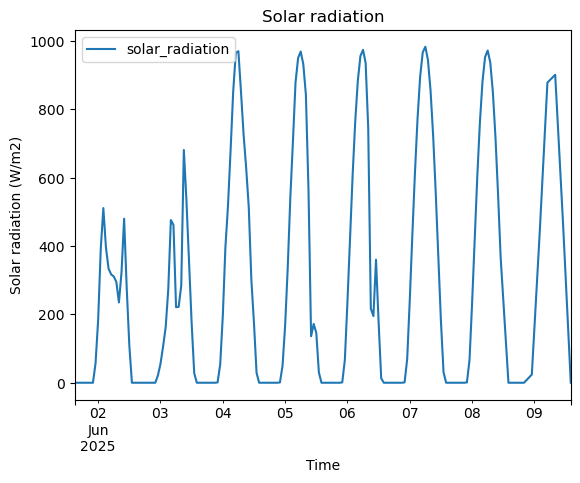

In [113]:
sdf_solar.set_index('time', inplace=True)
sdf_solar.plot(kind='line', title='Solar radiation', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [114]:
sdf_solar['pv'] = sdf_solar['solar_radiation'] * efficiency * total_area / 1000
sdf_solar

,solar_radiation,pv
time,,
2025-06-01 15:00:00,0.0,0.000
2025-06-01 16:00:00,0.0,0.000
2025-06-01 17:00:00,0.0,0.000
2025-06-01 18:00:00,0.0,0.000
2025-06-01 19:00:00,0.0,0.000
...,...,...
2025-06-09 10:00:00,613.0,147.120
2025-06-09 11:00:00,469.0,112.560
2025-06-09 12:00:00,312.7,75.048


<Axes: title={'center': 'Solar Farm Power'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

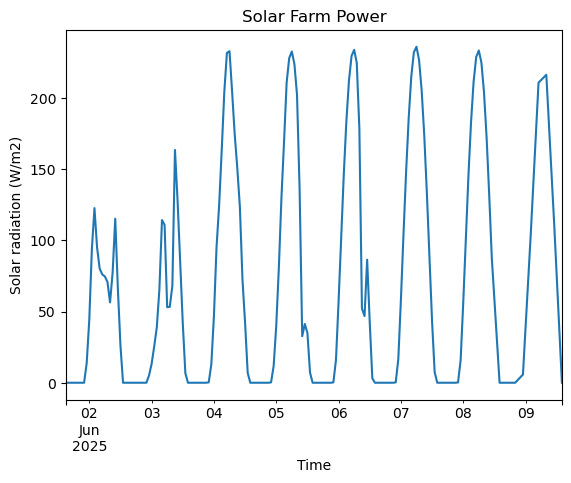

In [115]:
sdf_solar['pv'].plot(kind='line', title='Solar Farm Power', xlabel='Time', ylabel='Solar radiation (W/m2)')

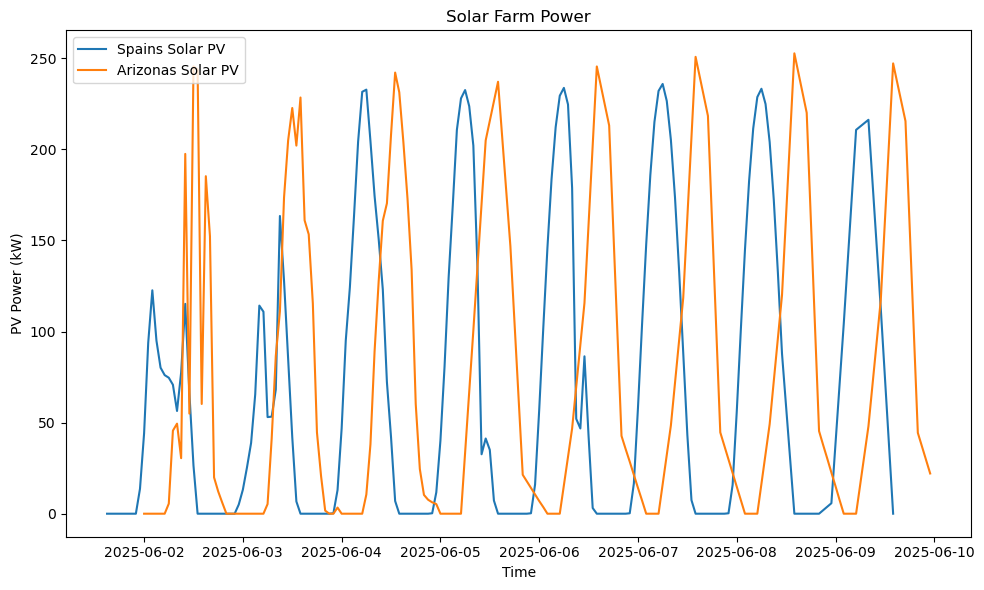

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(sdf_solar['pv'], label='Spains Solar PV')
plt.plot(df_solar['pv'], label='Arizonas Solar PV')

plt.title('Solar Farm Power')
plt.xlabel('Time')
plt.ylabel('PV Power (kW)')
plt.legend()
plt.tight_layout()

plt.show()